In [7]:
import numpy as np
from scipy.optimize import minimize
from scipy.spatial import distance

np.set_printoptions(suppress=True)



speed_of_sound = 340  # 声速，单位：米/秒
def haversine_distance(lat1, lon1, lat2, lon2, elevation1, elevation2):
    R = 6371000  # 地球半径，单位：米
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    delta_lat = lat2 - lat1
    delta_lon = lon2 - lon1
    a = np.sin(delta_lat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(delta_lon / 2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    horizontal_distance = R * c
    vertical_distance = elevation2 - elevation1
    distance = np.sqrt(horizontal_distance**2 + vertical_distance**2)
    return distance

def objective(x):
    residuals = []
    for i in range(len(coordinates)):
        for j in range(4):  # 四个音爆事件
            # x中包含所有音爆的经度、纬度、高程和时间
            index = 4 * j
            lon, lat, ele, t0 = x[index:index+4]
            dist = haversine_distance(lat, lon, coordinates[i, 1], coordinates[i, 0], ele, coordinates[i, 2])
            predicted_time = dist / speed_of_sound + t0
            residuals.append((predicted_time - times[i, j])**2)
    return sum(residuals)
from scipy.optimize import minimize, Bounds
from functools import partial
# 定义合理的高程和时间约束
    # 构建每对时间差不超过5秒的约束
def time_diff_constraint(x, i, j):
    return 5 - abs(x[4*i+3] - x[4*j+3])

In [8]:

# 输入数据：监测设备的坐标和音爆抵达时间
coordinates = np.array([
    [110.241, 27.204, 824],
    [110.783, 27.456, 727],
    [110.762, 27.785, 742],
    [110.251, 28.025, 850],
    [110.524, 27.617, 786],
    [110.467, 28.081, 678],
    [110.047, 27.521, 575]
])

times = np.array([
    [100.767, 164.229, 214.850, 270.065],
    [92.453, 112.220, 169.362, 196.583],
    [75.560, 110.696, 156.936, 188.020],
    [94.653, 141.409, 196.517, 258.985],
    [78.600, 86.216, 118.443, 126.669],
    [67.274, 166.270, 175.482, 266.871],
    [103.738, 163.024, 206.789, 210.306]
])
bounds = Bounds(
        [110, 27, 0, -200] * 4,  # 每个参数的下界
        [111, 29, 2000, 200] * 4  # 每个参数的上界
    )

    # 列表生成所有时间差约束
cons= ({'type': 'ineq', 'fun': partial(time_diff_constraint, i=i, j=j)} for i in range(4) for j in range(i+1, 4))
# 使用更精细的初始猜测
initial_guess = []
avg_time = np.mean(times, axis=1)  # 每个设备的平均记录时间作为参考
for j in range(4):  # 四个音爆
    # 使用数据中心位置和时间的平均值作为初始猜测
    mean_lon = np.mean(coordinates[:, 0])
    mean_lat = np.mean(coordinates[:, 1])
    mean_ele = np.mean(coordinates[:, 2])
    mean_time = np.mean(avg_time) +1 * j  
    initial_guess.extend([mean_lon, mean_lat, mean_ele, mean_time])
# 使用带约束的优化方法
result = minimize(
    objective, 
    initial_guess, 
    method='SLSQP',
    bounds=bounds,
    constraints=cons,
    options={'maxiter': 1000}
)
# 检查优化结果
if result.success:
    print("Optimization successful.")
    print("Optimized values:")
else:
    print("Optimization failed.")
    print("Reason:", result.message)
result.x

Optimization successful.
Optimized values:


C:\Users\Stream\AppData\Roaming\spsspro\spsspro\lib\python\lib\site-packages\scipy\optimize\_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


array([110.53779996,  27.94783481, 740.28760802,  -2.94687516,
       110.53227339,  27.7133995 , 740.28571429,  -1.65106139,
       110.56092896,  28.20618503, 740.28392525,  -1.30645487,
       110.73513878,  27.35342774, 740.28795334,  -0.17324655])

In [4]:
import numpy as np

times = np.array([
    [100.767, 164.229, 214.850, 270.065],
    [92.453, 112.220, 169.362, 196.583],
    [75.560, 110.696, 156.936, 188.020],
    [94.653, 141.409, 196.517, 258.985],
    [78.600, 86.216, 118.443, 126.669],
    [67.274, 166.270, 175.482, 266.871],
    [103.738, 163.024, 206.789, 210.306]
])

  


In [7]:
allresult=[]
for kk in range(1000):
    bounds = Bounds(
        [110, 27, 0, -200] * 4,  # 每个参数的下界
        [111, 29, 2000, 200] * 4  # 每个参数的上界
    )

    # 列表生成所有时间差约束
    cons= ({'type': 'ineq', 'fun': partial(time_diff_constraint, i=i, j=j)} for i in range(4) for j in range(i+1, 4))
    

        # 使用更精细的初始猜测
        # Add random error between 0 and 0.5 to each element in the array
    error = np.random.uniform(0, 0.5, size=times.shape)
    times_with_error = times + error
    def objective(x):
        residuals = []
        for i in range(len(coordinates)):
            for j in range(4):  # 四个音爆事件
                # x中包含所有音爆的经度、纬度、高程和时间
                index = 4 * j
                lon, lat, ele, t0 = x[index:index+4]
                dist = haversine_distance(lat, lon, coordinates[i, 1], coordinates[i, 0], ele, coordinates[i, 2])
                predicted_time = dist / speed_of_sound + t0
                residuals.append((predicted_time - times_with_error[i, j])**2)
        return sum(residuals)  
    initial_guess = []
    avg_time = np.mean(times_with_error, axis=1)  # 每个设备的平均记录时间作为参考
    for j in range(4):  # 四个音爆
        # 使用数据中心位置和时间的平均值作为初始猜测
        mean_lon = np.mean(coordinates[:, 0])
        mean_lat = np.mean(coordinates[:, 1])
        mean_ele = np.mean(coordinates[:, 2])
        mean_time = np.mean(avg_time) +1 * j  
        initial_guess.extend([mean_lon, mean_lat, mean_ele, mean_time])
    # 使用带约束的优化方法
    result = minimize(
        objective, 
        initial_guess, 
        method='SLSQP',
        bounds=bounds,
        constraints=cons,
        options={'maxiter': 1000}
    )
    # 检查优化结果
    if result.success:
        allresult.append(result.x)
    else:
        pass
    

In [8]:
result.x

array([110.42711051,  27.70153532, 741.92520669,  21.19854836,
       110.45211029,  27.66555406, 740.28171566,  21.19854843,
       110.42904736,  27.71018458, 676.82717885,  26.19856496,
       110.72835985,  27.29361511, 828.87271294,  26.19856339])

In [6]:
['噪声_'+i for i in ['残骸1经度','残骸1纬度','残骸1高程','残骸1音爆发生时间',
                  '残骸2经度','残骸2纬度','残骸2高程','残骸2音爆发生时间',
                  '残骸3经度','残骸3纬度','残骸3高程','残骸3音爆发生时间',
                  '残骸4经度','残骸4纬度','残骸4高程','残骸4音爆发生时间']]

['噪声_残骸1经度',
 '噪声_残骸1纬度',
 '噪声_残骸1高程',
 '噪声_残骸1音爆发生时间',
 '噪声_残骸2经度',
 '噪声_残骸2纬度',
 '噪声_残骸2高程',
 '噪声_残骸2音爆发生时间',
 '噪声_残骸3经度',
 '噪声_残骸3纬度',
 '噪声_残骸3高程',
 '噪声_残骸3音爆发生时间',
 '噪声_残骸4经度',
 '噪声_残骸4纬度',
 '噪声_残骸4高程',
 '噪声_残骸4音爆发生时间']

In [10]:
import pandas as pd

In [11]:
allresult=pd.DataFrame(allresult)
allresult

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,110.450135,27.979312,740.289106,-35.813936,110.607913,27.734129,740.285714,-34.373986,110.642222,27.998251,740.285714,-34.897014,110.655263,27.396925,740.286648,-33.456228
1,110.424091,27.702518,740.093314,16.931623,110.452056,27.664861,740.285100,21.011756,110.420824,27.711459,740.320823,21.931623,111.000000,27.576773,740.379189,21.931623
2,110.677844,28.287622,740.287547,-11.920694,110.668698,27.365171,740.289379,-11.390081,110.677172,28.292588,740.285714,-10.859435,110.680430,27.378224,740.289379,-10.328777
3,110.704647,28.299355,740.285714,-13.396842,110.704647,27.352843,740.287563,-12.870098,110.704647,28.299355,740.285714,-12.343354,110.704647,27.352843,740.285714,-11.816610
4,110.528942,28.001724,740.285714,-54.028808,110.736498,27.662288,740.286318,-53.616989,110.751428,28.005133,740.292440,-53.205148,110.753628,27.291768,740.285714,-52.793297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,110.609682,28.250346,740.285714,-5.709348,110.579188,27.399571,740.287478,-5.161878,110.607893,28.266114,740.289242,-4.614304,110.618165,27.443416,740.283950,-4.066684
881,110.680589,28.289117,740.287549,-12.110538,110.672369,27.363746,740.285714,-11.580486,110.679962,28.293355,740.289384,-11.050405,110.682815,27.375600,740.283880,-10.520311
882,110.424210,27.702334,740.289884,16.960524,110.451694,27.664803,739.913250,21.006158,110.421255,27.711143,740.280497,21.960525,111.000000,27.577972,740.312349,21.960525
883,110.427230,27.701396,740.268962,21.170701,110.451224,27.664173,740.280764,21.170704,110.429774,27.710780,740.282623,26.170706,110.728103,27.293708,740.289777,26.170703


In [12]:
allresult.columns=['残骸1经度','残骸1纬度','残骸1高程','残骸1音爆发生时间',
                  '残骸2经度','残骸2纬度','残骸2高程','残骸2音爆发生时间',
                  '残骸3经度','残骸3纬度','残骸3高程','残骸3音爆发生时间',
                  '残骸4经度','残骸4纬度','残骸4高程','残骸4音爆发生时间']

In [13]:
import pandas as pd

# 设置浮点显示格式，避免科学计数法
pd.set_option('display.float_format', '{:.8f}'.format)

allresult.describe()

,残骸1经度,残骸1纬度,残骸1高程,残骸1音爆发生时间,残骸2经度,残骸2纬度,残骸2高程,残骸2音爆发生时间,残骸3经度,残骸3纬度,残骸3高程,残骸3音爆发生时间,残骸4经度,残骸4纬度,残骸4高程,残骸4音爆发生时间
count,885.00000000,885.00000000,885.00000000,885.00000000,885.00000000,885.00000000,885.00000000,885.00000000,885.00000000,885.00000000,885.00000000,885.00000000,885.00000000,885.00000000,885.00000000,885.00000000
mean,110.52676062,27.96629490,741.18699954,-2.29886396,110.54970853,27.56907048,740.32575863,-1.07738555,110.56462236,27.97368165,741.74876935,0.44880481,110.76058658,27.40161726,743.63168657,0.79748334
std,0.10951440,0.25684195,16.16539634,23.32707902,0.10958229,0.15499097,53.52508527,23.86216934,0.13230223,0.25599089,66.31319979,24.99280156,0.13559230,0.11261110,77.83328818,24.73168729
min,110.32771457,27.70092391,618.75726859,-56.77891630,110.36800565,27.24253331,0.00000000,-56.37468895,110.41919985,27.63565116,0.00000000,-55.97046159,110.27976366,27.22688982,0.00000049,-55.56623423
25%,110.42706306,27.70230452,740.27499626,-13.38826423,110.45172229,27.38784693,740.27692066,-12.86074242,110.42910024,27.71135284,740.27855393,-12.33477388,110.69601396,27.29374969,740.27874259,-11.80736578
50%,110.49753923,27.99283696,740.28571429,-2.11078323,110.50144372,27.66441981,740.28571429,-1.55343960,110.56998752,27.99726302,740.28571429,-0.99595796,110.72687076,27.35287429,740.28571429,-0.01601652
75%,110.62979009,28.26231808,740.28756313,16.95241230,110.66613693,27.66493879,740.28904724,21.09023729,110.70462702,28.27513040,740.28883430,21.95068176,110.77037695,27.49990102,740.28753200,21.95068175
max,110.70471322,28.29951206,1050.93591344,23.28578652,110.79275224,28.08937180,2000.00000000,24.48914005,110.81007188,28.29951206,1999.99999914,26.38243992,111.00000000,27.76444683,2000.00000000,26.38243986


In [14]:
allresult.describe().to_excel('describe.xlsx')

In [15]:
# 中文图表注释
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei'] # 中文支持
plt.rcParams['axes.unicode_minus']=False

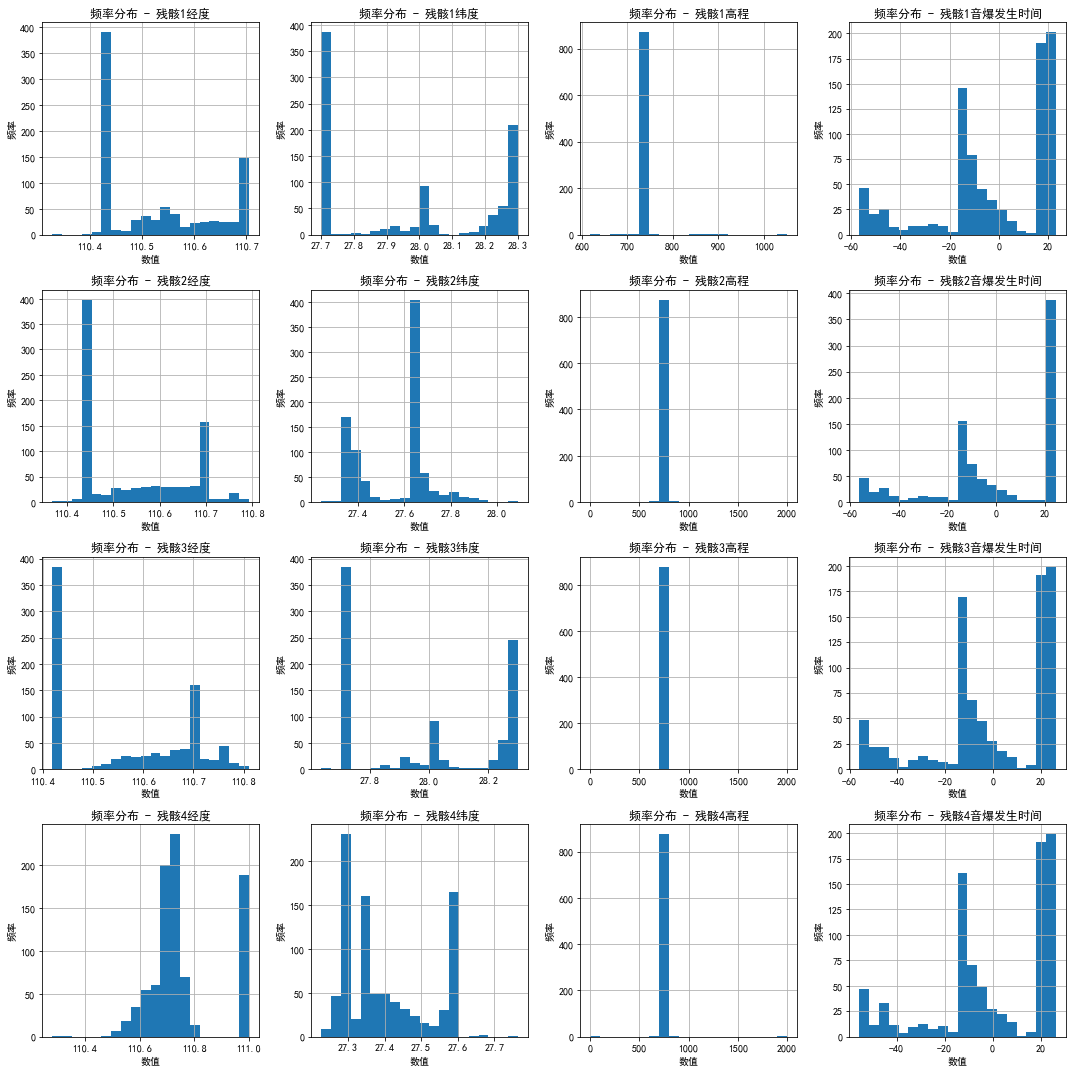

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4, figsize=(15, 15))  # 创建一个4x4的子图布局

# 遍历 allresult 中的每一列数据
for i, ax in enumerate(axes.flat):
    # 为每个数据列生成直方图
    allresult.iloc[:, i].hist(ax=ax, bins=20)  # bins 参数用于控制直方图的柱形数量，根据数据的分布调整

    # 设置图表标题和坐标轴标签
    ax.set_title(f'频率分布 - {allresult.columns[i]}')
    ax.set_xlabel('数值')
    ax.set_ylabel('频率')
    ax.grid(True)  # 显示网格线

plt.tight_layout()  # 调整子图布局
plt.show()  # 显示图表


In [17]:
allresult.describe()

,残骸1经度,残骸1纬度,残骸1高程,残骸1音爆发生时间,残骸2经度,残骸2纬度,残骸2高程,残骸2音爆发生时间,残骸3经度,残骸3纬度,残骸3高程,残骸3音爆发生时间,残骸4经度,残骸4纬度,残骸4高程,残骸4音爆发生时间
count,885.00000000,885.00000000,885.00000000,885.00000000,885.00000000,885.00000000,885.00000000,885.00000000,885.00000000,885.00000000,885.00000000,885.00000000,885.00000000,885.00000000,885.00000000,885.00000000
mean,110.52676062,27.96629490,741.18699954,-2.29886396,110.54970853,27.56907048,740.32575863,-1.07738555,110.56462236,27.97368165,741.74876935,0.44880481,110.76058658,27.40161726,743.63168657,0.79748334
std,0.10951440,0.25684195,16.16539634,23.32707902,0.10958229,0.15499097,53.52508527,23.86216934,0.13230223,0.25599089,66.31319979,24.99280156,0.13559230,0.11261110,77.83328818,24.73168729
min,110.32771457,27.70092391,618.75726859,-56.77891630,110.36800565,27.24253331,0.00000000,-56.37468895,110.41919985,27.63565116,0.00000000,-55.97046159,110.27976366,27.22688982,0.00000049,-55.56623423
25%,110.42706306,27.70230452,740.27499626,-13.38826423,110.45172229,27.38784693,740.27692066,-12.86074242,110.42910024,27.71135284,740.27855393,-12.33477388,110.69601396,27.29374969,740.27874259,-11.80736578
50%,110.49753923,27.99283696,740.28571429,-2.11078323,110.50144372,27.66441981,740.28571429,-1.55343960,110.56998752,27.99726302,740.28571429,-0.99595796,110.72687076,27.35287429,740.28571429,-0.01601652
75%,110.62979009,28.26231808,740.28756313,16.95241230,110.66613693,27.66493879,740.28904724,21.09023729,110.70462702,28.27513040,740.28883430,21.95068176,110.77037695,27.49990102,740.28753200,21.95068175
max,110.70471322,28.29951206,1050.93591344,23.28578652,110.79275224,28.08937180,2000.00000000,24.48914005,110.81007188,28.29951206,1999.99999914,26.38243992,111.00000000,27.76444683,2000.00000000,26.38243986


In [18]:
allresult.to_excel('allresult.xlsx',index=None)

In [19]:
tt=[110.42441839,  27.70252304, 740.28245091,  16.66192301,
       110.4516443 ,  27.66467136, 740.29067183,  20.78341248,
       110.42129289,  27.71169323, 740.27166831,  21.66192302,
       111.        ,  27.57693802, 740.27960534,  21.66192302]



In [62]:
mean_values.index

Index(['残骸1经度', '残骸1纬度', '残骸1高程', '残骸1音爆发生时间', '残骸2经度', '残骸2纬度', '残骸2高程',
       '残骸2音爆发生时间', '残骸3经度', '残骸3纬度', '残骸3高程', '残骸3音爆发生时间', '残骸4经度', '残骸4纬度',
       '残骸4高程', '残骸4音爆发生时间'],
      dtype='object')

In [21]:
for i,j in enumerate(mean_values):
    print(j,mean_values.index[i])
    break

110.5267606196555 残骸1经度


In [22]:
import pandas as pd
from scipy import stats
# 假设 allresult 是已经存在的 DataFrame，并且列名称已经设置
reference_value = 110.42441839

# 计算 '残骸1经度' 列的均值
mean_longitude = allresult['残骸1经度'].mean()

# 计算标准差
std_deviation = allresult['残骸1经度'].std()

# 计算 Cohen's d用于衡量两个群体间效应大小，通过计算实验组与对照组均值之差除以两组标准差的合并值来得到，其值通常以0.2、0.5和0.8分别代表小、中、大效应。
cohens_d = (mean_longitude - reference_value) / std_deviation

print(f"Cohen's d: {cohens_d}")


Cohen's d: 0.9345093180928298


In [23]:
t_statistic, p_value = stats.ttest_1samp(allresult['残骸1经度'], reference_value)
t_statistic, p_value 

(27.800670568496336, 9.981397290520192e-123)

In [24]:
tt=[110.42441839,  27.70252304, 740.28245091,  16.66192301,
       110.4516443 ,  27.66467136, 740.29067183,  20.78341248,
       110.42129289,  27.71169323, 740.27166831,  21.66192302,
       111.        ,  27.57693802, 740.27960534,  21.66192302]
count=0
for i,j in enumerate(mean_values):
    print(mean_values.index[i],'原始值:',j)
    reference_value = tt[count]
    # 计算 '残骸1经度' 列的均值
    mean_longitude = allresult[mean_values.index[i]].mean()

    # 计算标准差
    std_deviation = allresult[mean_values.index[i]].std()
    # 执行单样本 t-检验
    t_statistic, p_value = stats.ttest_1samp(allresult['残骸1经度'], reference_value)


    # 计算 Cohen's d用于衡量两个群体间效应大小，通过计算实验组与对照组均值之差除以两组标准差的合并值来得到，其值通常以0.2、0.5和0.8分别代表小、中、大效应。
    if mean_longitude - reference_value<=0:
        cohens_d = -(mean_longitude - reference_value) / std_deviation
    else:
         cohens_d = (mean_longitude - reference_value) / std_deviation
    print(f"t统计量: {t_statistic}",f" p值: {p_value}",' cohens_d值:',cohens_d)
    count+=1
    print('')

残骸1经度 原始值: 110.5267606196555
t统计量: 27.800670568496336  p值: 9.981397290520192e-123  cohens_d值: 0.9345093180928298

残骸1纬度 原始值: 27.966294898769206
t统计量: 22498.721708424415  p值: 0.0  cohens_d值: 1.0269812002533998

残骸1高程 原始值: 741.1869995405834
t统计量: -171069.4651008716  p值: 0.0  cohens_d值: 0.05595585853019189

残骸1音爆发生时间 原始值: -2.2988639600095455
t统计量: 25497.836397890725  p值: 0.0  cohens_d值: 0.8128230264319745

残骸2经度 原始值: 110.54970852886512
t统计量: 20.404910700988193  p值: 3.895710095991658e-76  cohens_d值: 0.8948911846983831

残骸2纬度 原始值: 27.56907047780187
t统计量: 22509.00389682002  p值: 0.0  cohens_d值: 0.6168158348839472

残骸2高程 原始值: 740.3257586270558
t统计量: -171071.69826590482  p值: 0.0  cohens_d值: 0.0006555206194888566

残骸2音爆发生时间 原始值: -1.077385546470356
t统计量: 24378.257789991665  p值: 0.0  cohens_d值: 0.9161278556725058

残骸3经度 原始值: 110.5646223569962
t统计量: 28.64969443825377  p值: 3.2996071180549214e-128  cohens_d值: 1.0833488584375557

残骸3纬度 原始值: 27.973681648517154
t统计量: 22496.230679724933  p值: 0.0  cohens_